# Εργασία - Αναγνώριση Προτύπων και Μηχανική Μάθηση, Μέρη Α-Γ
## Ομάδα 11
**Παναγιώτης Μπελαντάκης**, AEM: 10305  
**Αλέξανδρος Φωτιάδης**, AEM: 10392

## Μέρος Α
### Ερώτημα 1

In [64]:
# Part A 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
"""
Creating class Classifier. It will have three functions:__init__ for initialization, fit for the estimation of the Maximum Likelihood values
and function predict which will return the values the discriminative function g(x).
"""
class Classifier:
    def __init__(self):
        self.theta_mle = None

    def fit(self, D, theta_values):
        
        """
        Arguments:
            D (numpy array): The dataset for a class.
            theta_values (numpy array): The range of θ values to evaluate.
        Returns:
            float: .
        """
        
        log_likelihoods = []

        # Loop to get the log-likelihood for each value of θ vector
        for theta in theta_values:
            log_likelihoodVal = np.sum(np.log(1 / (np.pi * (1 + (D - theta) ** 2)))) # We take the sum instead of the product since we have already applied the log function to the likelihood 
            log_likelihoods.append(log_likelihoodVal)
            
        
        self.theta_mle = theta_values[np.argmax(log_likelihoods)] # Compute the θ value that maximizes log-likelihood
        return self.theta_mle, log_likelihoods # Returns The MLE value of θ and log[p(D1|θ)] and log[p(D2|θ)]

    def predict(self, D, theta1, theta2, prior1, prior2):
        """
        Arguments:
            D (numpy array): The dataset to classify.
            theta1 (float): MLE for class ω1.
            theta2 (float): MLE for class ω2.
            P_w1 (float): Prior probability for class ω1.
            P_w2 (float): Prior probability for class ω2.
        """
        #Computing log-likelihoods for the estimated θ1, θ2
        log_likelihood1 = np.log(1 / (np.pi * (1 + (D - theta1) ** 2)))
        log_likelihood2 = np.log(1 / (np.pi * (1 + (D - theta2) ** 2)))
        
        g_x = log_likelihood1 - log_likelihood2 + np.log(prior1) - np.log(prior2)
        return g_x #The values of the discriminative function g(x)


MLE for θ1:  2.5825825825825817
MLE for θ2:  -3.143143143143142


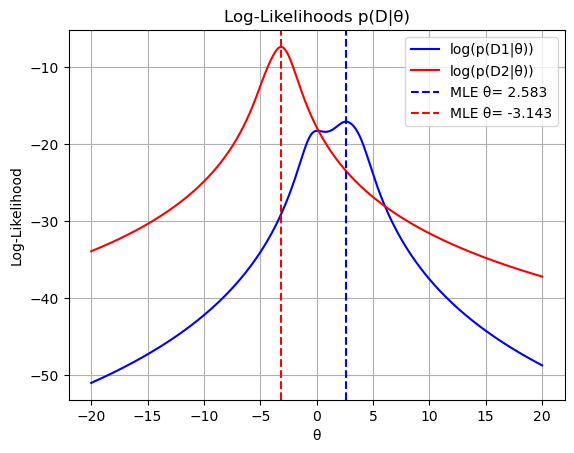

In [66]:
# Data for the two classes
D1 = np.array([2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1])
D2 = np.array([-4.5, -3.4, -3.1, -3.0, -2.3])

# Priors p(ω1) and p(ω2) for the classes
p_w1 = 7 / 12
p_w2 = 5 / 12

# Range of θ values to evaluate
thetaVal = np.linspace(-20, 20, 1000)

# Initialize the classifier
classifier = Classifier()

# Estimate θ1 for class ω1
theta1, log_likelihoods_D1 = classifier.fit(D1,thetaVal)
print("MLE for θ1: ",theta1)

# Estimate θ2 for class ω2
theta2, log_likelihoods_D2 = classifier.fit(D2,thetaVal)
print("MLE for θ2: ",theta2)

# Plot log-likelihoods for D1 and D2
plt.figure()
plt.plot(thetaVal, log_likelihoods_D1, label="log(p(D1|θ))", color="blue")
plt.plot(thetaVal, log_likelihoods_D2, label="log(p(D2|θ))", color="red")
plt.axvline(theta1, color="blue", linestyle="--", label="MLE θ= " + str(round(theta1, 3)))
plt.axvline(theta2, color="red", linestyle="--", label="MLE θ= " + str(round(theta2, 3)))
plt.xlabel("θ")
plt.ylabel("Log-Likelihood")
plt.title("Log-Likelihoods p(D|θ)")
plt.legend()
plt.grid()
plt.show()

### Ερώτημα 2

Dataset D1 with corresponding class
     x      g(x) Expexted Class Class
0  2.8  3.882680             ω1    ω1
1 -0.4  0.187346             ω1    ω1
2 -0.8 -0.314283             ω1    ω2
3  2.3  3.681556             ω1    ω1
4 -0.3  0.311916             ω1    ω1
5  3.6  3.464715             ω1    ω1
6  4.1  3.120768             ω1    ω1

Dataset D2 with corresponding class
     x      g(x) Expexted Class Class
0 -4.5 -2.554367             ω2    ω2
1 -3.4 -3.204899             ω2    ω2
2 -3.1 -3.166978             ω2    ω2
3 -3.0 -3.114131             ω2    ω2
4 -2.3 -2.338954             ω2    ω2


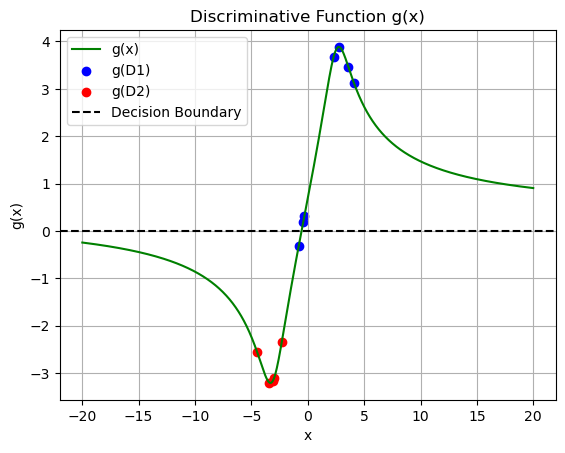

In [68]:
# Compute discriminative function g(x)
xVal = np.linspace(-20, 20, 1000)
g_x = classifier.predict(xVal, theta1, theta2, p_w1, p_w2)

g_D1 = classifier.predict(D1, theta1, theta2, p_w1, p_w2)
g_D2 = classifier.predict(D2, theta1, theta2, p_w1, p_w2)

#Expected Class for each dataset
classExp1 = ["ω1" for x in D1]
classExp2 = ["ω2" for x in D2]
#Classification for each index in both classes
classification1 = ["ω1" if g1>0 else "ω2" for g1 in g_D1]
classification2 = ["ω1" if g2>0 else "ω2" for g2 in g_D2]

#Creating a dataframe with values of x and the corresponding class
df1 = pd.DataFrame({"x":D1,"g(x)":g_D1,"Expexted Class":classExp1,"Class":classification1})
print("Dataset D1 with corresponding class")
print(df1)

print("\nDataset D2 with corresponding class")
df2 = pd.DataFrame({"x":D2,"g(x)":g_D2,"Expexted Class":classExp2,"Class":classification2})
print(df2)

# Plot g(x) along with g(D1) and g(D2)
plt.figure()
plt.plot(xVal, g_x, label="g(x)", color="green")
plt.scatter(D1, g_D1, color="blue", label="g(D1)")
plt.scatter(D2, g_D2, color="red", label="g(D2)")
plt.axhline(0, color="black", linestyle="--", label="Decision Boundary")
plt.xlabel("x")
plt.ylabel("g(x)")
plt.title("Discriminative Function g(x)")
plt.legend()
plt.grid()
plt.show()

## Μέρος Β
### Ερώτημα 1

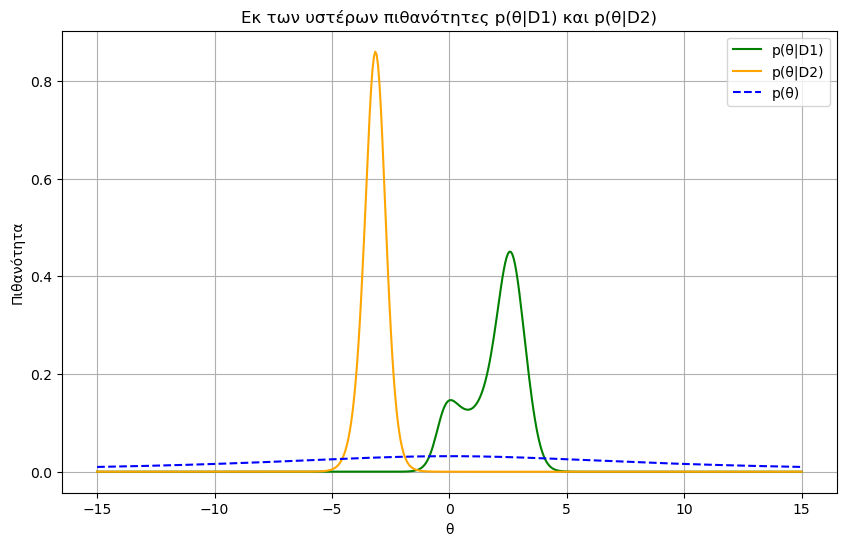

In [3]:
#Part B
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

D1 = np.array([2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1])  # Data for class ω1
D2 = np.array([-4.5, -3.4, -3.1, -3.0, -2.3])          # Data for class ω2

#Computing the prior p(θ)
def prior(theta):
    return 1/(10*np.pi*(1+(theta/10)**2))

#Computing the likelihood p(x|θ)
def likelihood(x,theta):
    return 1/(np.pi*(1+(x-theta)**2))

#Computing the posterior p(θ|D)
def posterior(theta,D):
    
    likelihood_product = np.prod([likelihood(x,theta) for x in D]) #We take the product since we have iid.
    numerator = prior(theta)*likelihood_product # p(θ)p(D|θ)
    
    #Calculating the integral using the numerical trapezoidal method. We take only the result without the error(second output).
    denominator, _ = quad(lambda theta:prior(theta)*np.prod([likelihood(x,theta) for x in D]), -np.inf, np.inf) 
    return numerator/denominator

#Vectors θ,D1,D2
theta_values = np.linspace(-15,15,500)
posterior_D1 = [posterior(theta,D1) for theta in theta_values]
posterior_D2 = [posterior(theta,D2) for theta in theta_values]

#Plots
plt.figure(figsize=(10,6))
plt.plot(theta_values, posterior_D1, label="p(θ|D1)", color="green")
plt.plot(theta_values, posterior_D2, label="p(θ|D2)", color="orange")
plt.plot(theta_values, [prior(theta) for theta in theta_values], label="p(θ)", color="blue", linestyle= "--")
plt.xlabel("θ")
plt.ylabel("Πιθανότητα")
plt.title("Εκ των υστέρων πιθανότητες p(θ|D1) και p(θ|D2)")
plt.legend()
plt.grid()
plt.show()

### Ερώτημα 2

1.614285714285714 -3.2600000000000002


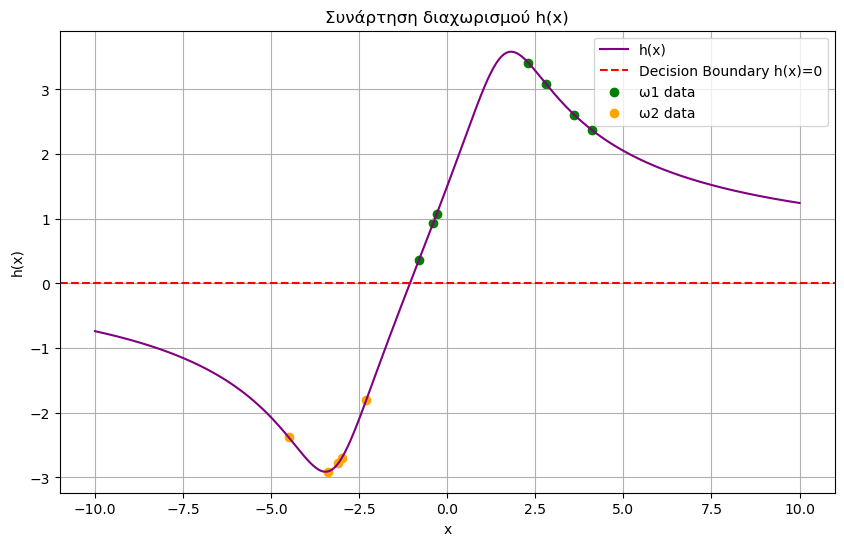

D1 classifications: [(2.8, 'ω1'), (-0.4, 'ω1'), (-0.8, 'ω1'), (2.3, 'ω1'), (-0.3, 'ω1'), (3.6, 'ω1'), (4.1, 'ω1')]
D2 classifications: [(-4.5, 'ω2'), (-3.4, 'ω2'), (-3.1, 'ω2'), (-3.0, 'ω2'), (-2.3, 'ω2')]


In [5]:
"""
#Computing p(x|D)
def prob_x_D(x,D):
    #product p(x|θ)*p(θ|D)
    def product(theta):
        return likelihood(x,theta)*posterior(theta,D)
    #Integration
    integral, _ = quad(product, -np.inf, np.inf)
    return integral
    
#Computing the predict function
def predict(x,D1,D2, p_w1=7/12, p_w2=5/12):
    p_x_D1 = prob_x_D(x,D1)
    p_x_D2 = prob_x_D(x,D2)
    return np.log(p_x_D1) - np.log(p_x_D2) + np.log(p_w1) - np.log(p_w2)

h_values = [predict(x,D1,D2) for x in x_values]
h_D1 = [predict(x,D1,D2) for x in D1] #values of h for each element of D1
h_D2 = [predict(x,D1,D2) for x in D2] #values of h for each element of D2
"""
"""
NOTE for the above code:
We observed that this way is too slow. Instead, we compute the mean of each dataset and apply it to the
pdf p(x|D). Results are equivalent because p(θ|D) for both datasets are sharply peaked around their mean so in the integral that we need to compute
p(x|D), we replace p(θ|D) with p(θ|D_mean).
"""
#Setting the predict function
def predict(x,D1_est,D2_est, p_w1=7/12, p_w2=5/12):
    log_likelihood1 = np.log(likelihood(x,D1_est))
    log_likelihood2 = np.log(likelihood(x,D2_est))
    h = log_likelihood1 - log_likelihood2 + np.log(p_w1) - np.log(p_w2)
    return h
    
D1_est = np.mean(D1)
D2_est = np.mean(D2)
x_values = np.linspace(-10,10,500)

h_values=[predict(x,D1_est,D2_est) for x in x_values]
h_D1 = [predict(x,D1_est,D2_est,p_w1=7/12,p_w2=5/12) for x in D1] #values of h for each element of D1
h_D2 = [predict(x,D1_est,D2_est,p_w1=7/12,p_w2=5/12) for x in D2] #values of h for each element of D2


#Plotting h(x) to show the decision rule
plt.figure(figsize=(10,6))
plt.plot(x_values, h_values, label="h(x)", color="purple")
plt.axhline(0, color='red', linestyle='--', label="Decision Boundary h(x)=0")
plt.scatter(D1,h_D1,color='green',label="ω1 data")
plt.scatter(D2,h_D2,color='orange',label="ω2 data")
plt.xlabel("x")
plt.ylabel("h(x)")
plt.title("Συνάρτηση διαχωρισμού h(x)")
plt.legend()
plt.grid()
plt.show() 

#Printing results for classification
classified_D1 = ["ω1" if val > 0 else "ω2" for val in h_D1]
classified_D2 = ["ω1" if val > 0 else "ω2" for val in h_D2]

print("D1 classifications:", list(zip(D1, classified_D1)))
print("D2 classifications:", list(zip(D2, classified_D2)))

## Μέρος Γ

### 1η Ενότητα 
#### Ερώτημα 1

In [84]:
# Part C, Unit 1
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load data from iris dataset
data = load_iris()
X = data.data[:, :2]  # Take the first two features
Y = data.target # Set Y equal to the label(species)

"""
Split the dataset to training and test set. 
- test_size = 0.5 means that half of the data correspond to the test set and the other half to the training set
- random_state = 42 for reproducibility

"""
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

# Decision Tree Classifier
#Initialization
best_accuracy = 0
best_depth = None
accuracies = []

"""
Loop computing decision tree classifiers for different depths to find the best depth and the 
corresponding accuracy
"""
for depth in range(1, 11):  
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_clf.fit(X_train, Y_train)
    Y_pred = dt_clf.predict(X_test) # Prediction of the species based on the test set after we trained our model
    acc = accuracy_score(Y_test, Y_pred)
    accuracies.append(acc)

    #Take in every loop the better accuracy and depth
    if acc > best_accuracy:
        best_accuracy = acc
        best_depth = depth

# Print result
print("Best tree depth:" + str(best_depth) + " with accuracy:" + str(round(best_accuracy,2)))

Best tree depth:3 with accuracy:0.79


#### Ερώτημα 2

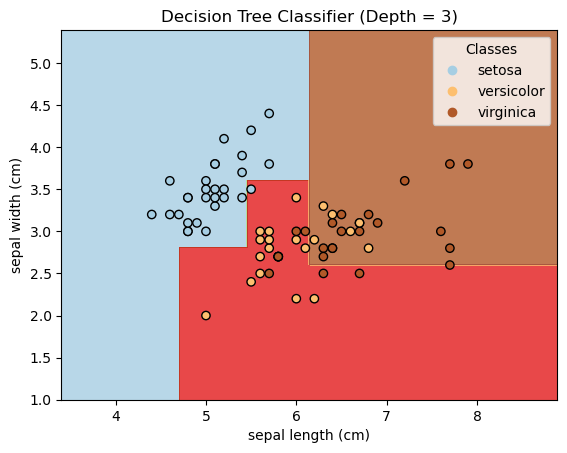

In [93]:
# Taking the best classifier
best_dt_clf = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
best_dt_clf.fit(X_train, Y_train)

"""
Creating the meshgrid so that we can apply the contourf method afterwards. In order for all the data to be visible, we apply a margin(+-1)
to expand the grid
"""
x1_min, x1_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
x2_min, x2_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))

Z = best_dt_clf.predict(np.c_[x1.ravel(), x2.ravel()]) #Assign a label to the test set based on the optimal classifier we created
"""
NOTE: We used .ravel() method to flatten our data into 2 1d arrays.Then we use np.c_ method to "connect" the flattened
values of x1 and x2 column-wise. Then we use predict to predict the labels so we get a 1D array which then transforms
to a 2D array with size same as x1 and x2 via reshape. Thus we get predictions for each coordinate (x1,x2)
"""
Z = Z.reshape(x1.shape)

#Plotting the regions that split the 3 classes for Decision Trees Classifier and scatter plots for initial points
plt.figure()
plt.contourf(x1, x2, Z, alpha=0.8, cmap=plt.cm.Paired) #Creates the regions for the three classes based on the predictions."alpha = 0.8" so that points can be distinguishes

scatter1 = plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, edgecolor='k', cmap=plt.cm.Paired) 
# c = Y_test is used so that points have the color that corresponds to their true class

# Add a legend for the classes
legend_labels = [data.target_names[i] for i in np.unique(Y)]  # Iris species names with the method target_names
handles = scatter1.legend_elements()[0]  # Get handles for legend
plt.legend(handles, legend_labels, title="Classes", loc="upper right")

plt.title(f"Decision Tree Classifier (Depth = {best_depth})")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.show()

### 2η Ενότητα 
#### Ερώτημα 1

In [141]:
# Part C, Unit 2
rf_accuracies = []
best_rf_accuracy = 0
best_rf_depth = None
#Apply the loop for each depth similarly like in decision trees classifier
for depth in range(1, 11):
    rf_clf = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42, bootstrap=True,max_samples=0.5)
    rf_clf.fit(X_train, Y_train)
    Y_pred = rf_clf.predict(X_test)
    rf_acc = accuracy_score(Y_test, Y_pred)
    rf_accuracies.append(rf_acc)
    
    #Take in every loop the better accuracy and depth
    if rf_acc > best_rf_accuracy:
        best_rf_accuracy = rf_acc
        best_rf_depth = depth

# Print result
print("Best tree depth:" + str(best_rf_depth) + " with accuracy:" + str(round(best_rf_accuracy,2)))

Best tree depth:2 with accuracy:0.83


#### Ερώτημα 2

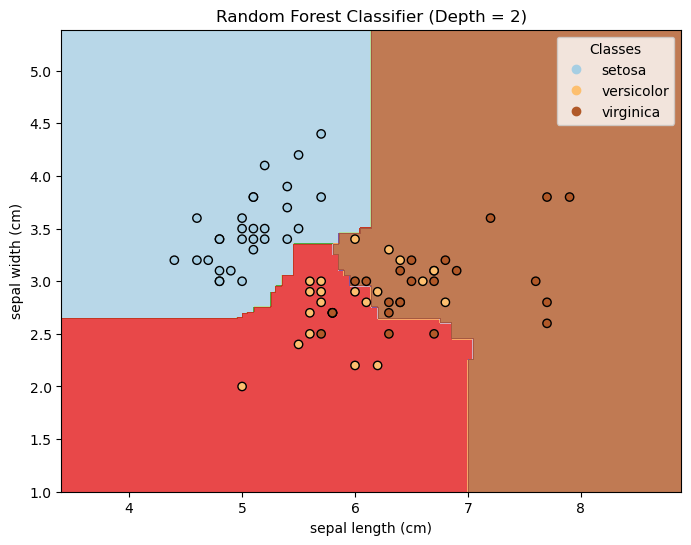

In [143]:
# Taking the best classifier
best_rf_clf = RandomForestClassifier(n_estimators=100, max_depth=best_rf_depth, random_state=42, bootstrap=True,max_samples=0.5)
best_rf_clf.fit(X_train, Y_train)

Z_rf = best_rf_clf.predict(np.c_[x1.ravel(), x2.ravel()])
Z_rf = Z_rf.reshape(x1.shape)

#Plot regions and the test set points
plt.figure(figsize=(8, 6))
plt.contourf(x1, x2, Z_rf, alpha=0.8, cmap=plt.cm.Paired)
#plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, edgecolor='k', cmap=plt.cm.Paired)
scatter2 = plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, edgecolor='k', cmap=plt.cm.Paired)
# Add a legend for the classes
legend_labels = [data.target_names[i] for i in np.unique(Y)]  # Iris species names
handles = scatter2.legend_elements()[0]  # Get handles for legend
plt.legend(handles, legend_labels, title="Classes", loc="upper right")
plt.title(f"Random Forest Classifier (Depth = {best_rf_depth})")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.show()

#### Ερώτημα 3

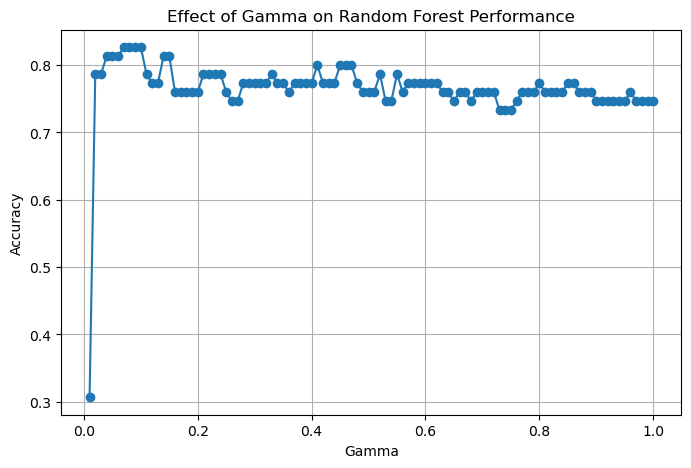

In [145]:
# Define a function to train a random forest with a specific gamma
def train_random_forest_with_gamma(X_train, Y_train, X_test, Y_test, gamma, n_estimators=100, random_state=42):
    
    # Size of bootstrap dataset
    bootstrap_size = round(gamma * len(X_train))
    
    # Create random forest classifier
    forest = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state, bootstrap=True, max_samples=bootstrap_size)
    
    # Train the classifier
    forest.fit(X_train, Y_train)
    
    # Predict on the test set
    Y_pred = forest.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(Y_test, Y_pred)
    return accuracy

# Test the effect of different gamma values
gamma_values = np.linspace(0.01,1,100)
accuracies = [train_random_forest_with_gamma(X_train, Y_train, X_test, Y_test, gamma) for gamma in gamma_values]

# Plot gamma vs accuracy
plt.figure(figsize=(8, 5))
plt.plot(gamma_values, accuracies, marker='o')
plt.title("Effect of Gamma on Random Forest Performance")
plt.xlabel("Gamma")
plt.ylabel("Accuracy")
plt.grid()
plt.show()